# 🌳 Modelo de Machine Learning para Predecir la Pobreza Monetaria en Perú

## 🎯 Objetivo de la Actividad
En este notebook, construiremos, entrenaremos y evaluaremos un modelo de **Random Forest** para predecir si un hogar en Perú caerá en situación de pobreza monetaria. Utilizaremos una base de datos sintética que simula las características de los hogares peruanos.

### ¿Por qué Random Forest?
El Random Forest (Bosque Aleatorio) es un modelo de *aprendizaje supervisado* ideal para este problema por varias razones:
- **Versatilidad**: Funciona muy bien tanto con variables numéricas como categóricas.
- **Robustez**: Es menos propenso al sobreajuste (overfitting) que un único árbol de decisión.
- **Interpretabilidad**: Nos permite conocer qué variables son las más importantes para predecir la pobreza.

### 📋 Hipótesis a Validar:
Esperamos que las variables más influyentes para predecir la pobreza sean:
1.  **Ingreso y Gasto del Hogar**: La relación directa con la capacidad económica.
2.  **Nivel Educativo y Años de Estudio**: A mayor educación, menor probabilidad de pobreza.
3.  **Tipo de Empleo**: El empleo formal protege contra la pobreza.
4.  **Área de Residencia**: La incidencia de pobreza suele ser mayor en zonas rurales.

### 🧠 Conceptos Clave que Aprenderemos:
- **Preprocesamiento de datos**: Cómo preparar variables categóricas y numéricas.
- **Pipelines en Scikit-learn**: Para organizar nuestro flujo de trabajo de forma profesional.
- **Entrenamiento de un clasificador**: Cómo enseñarle al modelo a partir de los datos.
- **Métricas de Evaluación**: No solo la exactitud (accuracy), sino también la **Precisión**, el **Recall** y la **Matriz de Confusión**, cruciales para problemas sociales.
- **Importancia de Variables (Feature Importance)**: Cómo el modelo nos "explica" su decisión.


## 📚 1. Definición del Problema y Preparación Inicial

In [ ]:
# Importamos las librerías necesarias para nuestro análisis

# Para manipulación de datos
import pandas as pd
import numpy as np

# Para visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# Para preprocesamiento y modelado con Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# Para evaluar el modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, RocCurveDisplay

# Configuraciones adicionales
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

print("✅ Librerías importadas correctamente. ¡Listos para empezar!")


✅ Librerías importadas correctamente. ¡Listos para empezar!


## 🛠️ 2. Preprocesamiento y Limpieza de Datos
Este es el paso más crítico en cualquier proyecto de Machine Learning.  Nuestro objetivo es transformar los datos crudos en un formato limpio y estructurado que el modelo pueda entender.

### Pasos a seguir:
1.  **Cargar los datos**: Importar nuestro archivo `prediccion_pobreza_peru.csv`.
2.  **Inspección inicial**: Entender la estructura, tipos de datos y buscar posibles problemas (aunque nuestra base es sintética y limpia).
3.  **Separar variables**: Dividir nuestro dataset en variables predictoras (`X`) y la variable objetivo (`y`).
4.  **Identificar tipos de variables**: Separar las columnas numéricas de las categóricas para aplicarles transformaciones diferentes.


In [3]:
# 2.1 Cargar e Inspeccionar los Datos
df = pd.read_csv('prediccion_pobreza_peru.csv')

print("Primeras 5 filas del dataset:")
display(df.head())

print("\nInformación general del DataFrame:")
df.info()

print(f"\nEl dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

# Verificamos que no haya valores nulos (importante en un caso real)
print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())


Primeras 5 filas del dataset:


,EdadJefeHogar,SexoJefeHogar,MiembrosHogar,RatioDependencia,LenguaMaterna,NivelEducativoJefeHogar,AniosEstudioJefeHogar,TipoEmpleo,IngresoMensualHogar,GastoMensualHogar,AreaResidencia,TenenciaVivienda,MaterialParedes,AccesoAguaPotable,AccesoSaneamiento,AccesoElectricidad,Hacinamiento,PoseeActivos,Region,PobrezaMonetaria
0,41,Hombre,1,2.00,Español,Primaria,3,Formal,7077.54,6757.56,Urbana,Propia,Ladrillo/Cemento,0,1,1,1,0,Sierra,0
1,33,Mujer,9,0.02,Quechua,Superior,8,Desempleado,8715.57,9230.89,Urbana,Alquilada,Adobe,0,1,1,0,1,Selva,0
2,19,Hombre,7,0.57,Quechua,Ninguno,20,Informal,3916.41,2990.82,Urbana,Propia,Ladrillo/Cemento,1,0,1,0,1,Costa,0
3,51,Mujer,6,0.97,Español,Primaria,17,Formal,6929.79,6838.63,Urbana,Propia,Ladrillo/Cemento,1,1,1,0,0,Costa,1
4,69,Hombre,6,1.37,Español,Secundaria,0,Informal,2174.85,2322.85,Urbana,Propia,Madera/Esteras,1,1,1,0,1,Sierra,0



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EdadJefeHogar            2000 non-null   int64  
 1   SexoJefeHogar            2000 non-null   object 
 2   MiembrosHogar            2000 non-null   int64  
 3   RatioDependencia         2000 non-null   float64
 4   LenguaMaterna            2000 non-null   object 
 5   NivelEducativoJefeHogar  2000 non-null   object 
 6   AniosEstudioJefeHogar    2000 non-null   int64  
 7   TipoEmpleo               2000 non-null   object 
 8   IngresoMensualHogar      2000 non-null   float64
 9   GastoMensualHogar        2000 non-null   float64
 10  AreaResidencia           2000 non-null   object 
 11  TenenciaVivienda         2000 non-null   object 
 12  MaterialParedes          2000 non-null   object 
 13  AccesoAguaPotable        2000 non-null   i

In [3]:
# 2.2 Separar variables predictoras (X) y objetivo (y)
X = df.drop('PobrezaMonetaria', axis=1)
y = df['PobrezaMonetaria']

print(f"Dimensiones de X (variables predictoras): {X.shape}")
print(f"Dimensiones de y (variable objetivo): {y.shape}")

# 2.3 Identificar columnas numéricas y categóricas
numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

print(f"\nColumnas Numéricas ({len(numerical_cols)}): {list(numerical_cols)}")
print(f"\nColumnas Categóricas ({len(categorical_cols)}): {list(categorical_cols)}")


Dimensiones de X (variables predictoras): (2000, 19)
Dimensiones de y (variable objetivo): (2000,)

Columnas Numéricas (11): ['EdadJefeHogar', 'MiembrosHogar', 'RatioDependencia', 'AniosEstudioJefeHogar', 'IngresoMensualHogar', 'GastoMensualHogar', 'AccesoAguaPotable', 'AccesoSaneamiento', 'AccesoElectricidad', 'Hacinamiento', 'PoseeActivos']

Columnas Categóricas (8): ['SexoJefeHogar', 'LenguaMaterna', 'NivelEducativoJefeHogar', 'TipoEmpleo', 'AreaResidencia', 'TenenciaVivienda', 'MaterialParedes', 'Region']


## 3. División de los Datos (Entrenamiento y Prueba)
Para evaluar de manera honesta el rendimiento de nuestro modelo, debemos dividir nuestros datos en dos conjuntos:
- **Conjunto de Entrenamiento (Training set)**: Usado para "enseñar" al modelo. Generalmente es el 70-80% de los datos.
- **Conjunto de Prueba (Test set)**: Usado para evaluar qué tan bien generaliza el modelo a datos nuevos que nunca ha visto.

Usaremos el parámetro `stratify=y` para asegurar que la proporción de hogares pobres y no pobres sea la misma en ambos conjuntos. Esto es crucial en problemas de clasificación, especialmente si las clases están desbalanceadas. 


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,      # 30% de los datos para el conjunto de prueba
    random_state=42,    # Semilla para reproducibilidad
    stratify=y          # Mantener la proporción de la variable objetivo
)

print("Distribución de la variable objetivo en el conjunto original:")
print(y.value_counts(normalize=True))

print("\nDistribución en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nDistribución en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))

print(f"\nTamaño del conjunto de entrenamiento: {X_train.shape[0]} hogares")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} hogares")


Distribución de la variable objetivo en el conjunto original:
PobrezaMonetaria
0    0.696
1    0.304
Name: proportion, dtype: float64

Distribución en el conjunto de entrenamiento:
PobrezaMonetaria
0    0.695714
1    0.304286
Name: proportion, dtype: float64

Distribución en el conjunto de prueba:
PobrezaMonetaria
0    0.696667
1    0.303333
Name: proportion, dtype: float64

Tamaño del conjunto de entrenamiento: 1400 hogares
Tamaño del conjunto de prueba: 600 hogares


### 💡 Análisis de la División: Confirmando el Desbalance de Clases

Los resultados de la división de datos nos muestran algo fundamental sobre nuestro problema:

-   **Proporción de Clases:** En todos nuestros conjuntos (original, entrenamiento y prueba), la distribución es constante: aproximadamente **70% de hogares no pobres (clase 0)** y **30% de hogares pobres (clase 1)**.

Esta distribución confirma que estamos ante un problema de **desbalance de clases moderado**.

#### **¿Por qué este 70/30 es tan importante?**

Aunque no es un desbalance extremo (como 99/1), una proporción 70/30 es más que suficiente para **afectar negativamente las estimaciones de un modelo de machine learning** si no se trata adecuadamente.

1.  **El Sesgo hacia la Mayoría:** Por defecto, los algoritmos buscan minimizar el error total. Con un 70% de datos pertenecientes a la clase "No Pobre", el modelo tiene un fuerte incentivo para aprender a predecir esta clase mayoritaria, ya que así acierta la mayoría de las veces. Puede volverse "perezoso" y no esforzarse lo suficiente en aprender los patrones complejos que identifican a la clase minoritaria (los hogares pobres).

2.  **La Paradoja de la Exactitud:** Un modelo ingenuo que simplemente prediga "No Pobre" para todos los casos tendría una exactitud del 70%. A primera vista, esto podría parecer un buen resultado, pero en realidad el modelo sería completamente inútil para nuestro objetivo, que es identificar a quienes necesitan ayuda. Esto demuestra por qué la **exactitud (accuracy) es una métrica peligrosa y engañosa** en datasets desbalanceados.

3.  **La Importancia de la Métrica Correcta:** Dado este desbalance, nuestro enfoque no puede ser simplemente "acertar mucho". Debemos concentrarnos en nuestra capacidad para identificar correctamente a la clase minoritaria. Por eso, en los siguientes pasos, prestaremos especial atención al **Recall**, que mide cuántos de los hogares realmente pobres fuimos capaces de encontrar.

Haber confirmado esta distribución 70/30 justifica plenamente las decisiones que tomaremos más adelante:
-   Utilizar métricas como **Recall, Precisión y F1-Score** en lugar de solo la exactitud.
-   Implementar técnicas como el **ajuste de pesos (`class_weight='balanced'`)** para forzar al modelo a prestar la debida atención a la población pobre.

## ⚙️ 4. Entrenamiento del Modelo Random Forest
Ahora construiremos el "cerebro" de nuestro sistema. Para hacerlo de forma ordenada y profesional, usaremos **Pipelines**.

### ¿Qué es un Pipeline?
Un Pipeline de Scikit-learn encadena múltiples pasos de preprocesamiento y modelado en un solo objeto. Esto tiene grandes ventajas:
- **Código más limpio**: Evita tener que aplicar transformaciones paso a paso.
- **Previene errores**: Asegura que apliquemos las mismas transformaciones a los datos de entrenamiento y de prueba.
- **Facilita la automatización**: Simplifica la búsqueda de los mejores parámetros (hiperparámetros).

### Nuestro Pipeline contendrá:
1.  **Un transformador para variables numéricas**: `StandardScaler` para estandarizarlas (media 0, desviación 1).
2.  **Un transformador para variables categóricas**: `OneHotEncoder` para convertirlas a un formato numérico que el modelo entienda.
3.  **El modelo clasificador**: `RandomForestClassifier`.


In [5]:
# Creamos el pipeline para las variables numéricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Creamos el pipeline para las variables categóricas
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # 'ignore' para manejar categorías en test que no estaban en train
])

# Combinamos los preprocesadores usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough' # Mantiene columnas no especificadas (si las hubiera)
)

# Creamos el modelo de Random Forest
# Usamos class_weight='balanced' para que el modelo preste más atención a la clase minoritaria (pobres)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')

# Creamos el Pipeline final que une el preprocesador y el modelo
pipeline_final = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_model)
])

# ¡Entrenamos el modelo!
print("🚀 Entrenando el modelo Random Forest...")
pipeline_final.fit(X_train, y_train)
print("✅ ¡Modelo entrenado exitosamente!")


🚀 Entrenando el modelo Random Forest...
✅ ¡Modelo entrenado exitosamente!


## 📊 5. Evaluación del Modelo
Entrenar un modelo no es suficiente. Necesitamos saber qué tan bueno es. Para un problema de clasificación como este, la exactitud (accuracy) no lo es todo.

### Métricas Clave:
- **Matriz de Confusión**: Una tabla que nos muestra los aciertos y errores del modelo.
  - **Verdaderos Positivos (TP)**: Predijo "Pobre" y acertó.
  - **Verdaderos Negativos (TN)**: Predijo "No Pobre" y acertó.
  - **Falsos Positivos (FP)**: Predijo "Pobre" pero era "No Pobre" (Error Tipo I).
  - **Falsos Negativos (FN)**: Predijo "No Pobre" pero era "Pobre" (Error Tipo II). **¡Este es el error más costoso socialmente!**
- **Precisión (Precision)**: De todos los que predijo como "Pobres", ¿cuántos lo eran realmente? `TP / (TP + FP)`
- **Recall (Sensibilidad)**: De todos los que *eran* "Pobres", ¿a cuántos identificamos correctamente? `TP / (TP + FN)`. **¡Métrica crucial para este problema!**
- **F1-Score**: La media armónica de Precisión y Recall. Un buen balance entre ambas.
- **ROC-AUC Score**: Mide la capacidad del modelo para distinguir entre las dos clases. Un valor de 1 es perfecto, 0.5 es aleatorio.


Classification Report
              precision    recall  f1-score   support

No Pobre (0)       0.72      0.96      0.82       418
   Pobre (1)       0.62      0.16      0.26       182

    accuracy                           0.72       600
   macro avg       0.67      0.56      0.54       600
weighted avg       0.69      0.72      0.65       600

Accuracy (Exactitud): 0.7167
ROC-AUC Score: 0.6614

Matriz de Confusión:


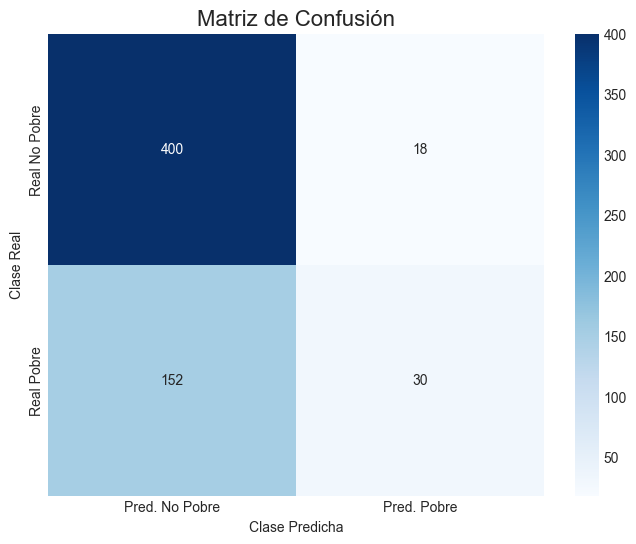

In [6]:
# Hacemos predicciones en el conjunto de prueba
y_pred = pipeline_final.predict(X_test)
y_pred_proba = pipeline_final.predict_proba(X_test)[:, 1] # Probabilidades para la clase positiva

# 1. Reporte de Clasificación
print("="*60)
print("Classification Report")
print("="*60)
print(classification_report(y_test, y_pred, target_names=['No Pobre (0)', 'Pobre (1)']))

# 2. Accuracy y ROC-AUC
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Accuracy (Exactitud): {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("="*60)

# 3. Matriz de Confusión
print("\nMatriz de Confusión:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Pred. No Pobre', 'Pred. Pobre'],
            yticklabels=['Real No Pobre', 'Real Pobre'])
plt.title('Matriz de Confusión', fontsize=16)
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.show()


Curva ROC:


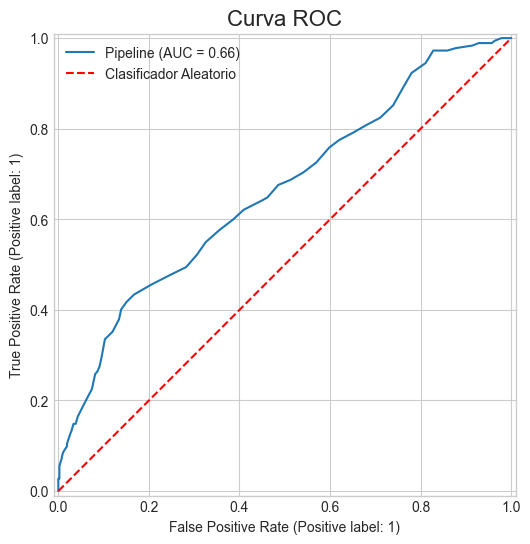

In [7]:
# 4. Curva ROC (Receiver Operating Characteristic)
# Esta curva nos muestra el rendimiento del clasificador en todos los umbrales de clasificación.
# Un buen modelo se pega a la esquina superior izquierda.

print("Curva ROC:")
fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(pipeline_final, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Clasificador Aleatorio')
ax.set_title('Curva ROC', fontsize=16)
plt.legend()
plt.show()


### Diagnóstico

Al analizar los resultados del modelo base, salta a la vista un problema crítico. Aunque la exactitud general es del **71.7%**, esta cifra es engañosa. El verdadero indicador de rendimiento para nuestro objetivo es el **`recall` para la clase "Pobre"**, que es de un alarmante **0.16 (16%)**.

**¿Qué significa esto en la práctica?**

Nuestro modelo actual solo está identificando correctamente a 16 de cada 100 hogares que realmente están en situación de pobreza. La matriz de confusión lo confirma con **152 Falsos Negativos**: 152 familias pobres que nuestro sistema no detectaría.

Este comportamiento se debe a que el modelo, para minimizar su error total, ha aprendido a ser muy bueno prediciendo la clase mayoritaria ("No Pobre"), pero a costa de ignorar a la minoría. Para un problema con un alto costo social, este resultado no es aceptable.

### ¿Cómo Mejorar la Identificación de Hogares Pobres?

Debemos "forzar" al modelo a ser más sensible a la clase minoritaria. Para ello, realizaremos un **ajuste de hiperparámetros**.

Usaremos una técnica llamada **`GridSearchCV`** (Búsqueda en Rejilla con Validación Cruzada) para encontrar la combinación óptima de hiperparámetros. Lo más importante es que le daremos una instrucción específica:

> **El objetivo no es maximizar la exactitud general, sino maximizar el `recall` para la clase "Pobre".**

De esta manera, `GridSearchCV` buscará la configuración que mejor identifique a los hogares pobres, incluso si eso implica cometer más errores con la clase no pobre. Es un intercambio que estamos dispuestos a hacer para cumplir nuestro objetivo principal.


In [ ]:
# 1. DEFINIR EL DICCIONARIO DE HIPERPARÁMETROS (LA "REJILLA")
# Este diccionario contiene las "perillas" del modelo que queremos ajustar y los valores a probar para cada una.
param_grid = {
    # 'classifier__' le dice al pipeline que este ajuste es para el paso llamado 'classifier'.
    
    # n_estimators: El número de árboles en el bosque.
    # Probaremos un modelo con 150 árboles y otro con 250.
    'classifier__n_estimators': [150, 250],
    
    # max_depth: La profundidad máxima de cada árbol.
    # Probaremos árboles más simples (10) y más complejos (20).
    'classifier__max_depth': [10, 20],
    
    # min_samples_leaf: El número mínimo de muestras en una hoja final.
    # Ayuda a prevenir que el modelo cree reglas demasiado específicas (sobreajuste).
    'classifier__min_samples_leaf': [2, 4],
    
    # class_weight: ¡La perilla más importante para nuestro problema!
    # Le indica al modelo cuánto más debe penalizar los errores en la clase minoritaria.
    # {0: 1, 1: 5} -> "Un error en la clase 'Pobre' (1) es 5 veces peor que en la 'No Pobre' (0)".
    # {0: 1, 1: 7} -> Una penalización aún más fuerte.
    # 'balanced' -> La opción automática que ajusta los pesos según la proporción de clases.
    'classifier__class_weight': [{0: 1, 1: 5}, {0: 1, 1: 7}, 'balanced']
}

# 2. CONFIGURAR EL BUSCADOR INTELIGENTE: GridSearchCV
# GridSearchCV probará todas las combinaciones de la rejilla anterior.
grid_search = GridSearchCV(
    # estimator: El modelo o pipeline base que se va a optimizar.
    estimator=pipeline_final,
    
    # param_grid: El diccionario con los parámetros a probar.
    param_grid=param_grid,
    
    # scoring: Le decimos que el objetivo es encontrar
    # el modelo con el RECALL más alto para la clase positiva (1).
    scoring='recall',
    
    # cv (Cross-Validation): Número de pliegues para la validación cruzada.
    # cv=3 significa que dividirá los datos de entrenamiento en 3, entrenará en 2 y probará en 1,
    # repitiendo el proceso 3 veces para asegurar un resultado estable.
    cv=3,
    
    # n_jobs: Número de núcleos de CPU a utilizar. -1 significa "usa todos los disponibles" para
    # acelerar el proceso de entrenamiento de múltiples modelos en paralelo.
    n_jobs=-1,
    
    # verbose: Muestra mensajes de progreso durante la búsqueda.
    verbose=1
)

# 3. EJECUTAR LA BÚSQUEDA
# La función .fit() inicia el proceso. GridSearchCV entrenará y evaluará
# 2 * 2 * 2 * 3 = 24 combinaciones, cada una con 3 pliegues de validación cruzada.
# En total, se entrenan 72 modelos para encontrar al ganador.
# Esto puede tardar varios minutos.
grid_search.fit(X_train, y_train)

# 4. MOSTRAR LOS RESULTADOS
print("\n✅ Búsqueda completada.")
# El atributo .best_params_ es un diccionario que contiene la combinación
# de hiperparámetros que logró el 'recall' más alto durante la búsqueda.
print("La mejor configuración de hiperparámetros es:")
print(grid_search.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits

✅ Búsqueda completada.
La mejor configuración de hiperparámetros es:
{'classifier__class_weight': {0: 1, 1: 7}, 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__n_estimators': 250}


### Evaluación Final: Modelo Optimizado


Rendimiento del Modelo Optimizado
              precision    recall  f1-score   support

No Pobre (0)       0.82      0.46      0.59       418
   Pobre (1)       0.38      0.76      0.51       182

    accuracy                           0.56       600
   macro avg       0.60      0.61      0.55       600
weighted avg       0.69      0.56      0.57       600



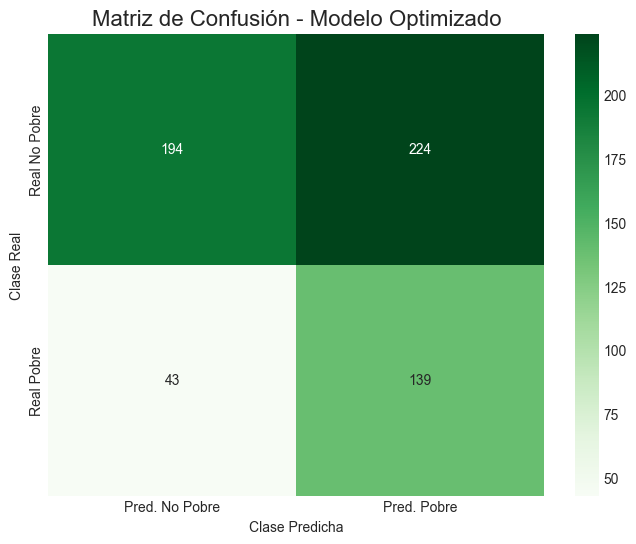

In [ ]:
# Extraemos el mejor modelo encontrado por GridSearchCV
best_model = grid_search.best_estimator_

# Hacemos predicciones con este nuevo modelo
y_pred_best = best_model.predict(X_test)

# Evaluamos el rendimiento del modelo optimizado
print("\n" + "="*60)
print("Rendimiento del Modelo Optimizado")
print("="*60)
print(classification_report(y_test, y_pred_best, target_names=['No Pobre (0)', 'Pobre (1)']))

# Visualizamos la nueva matriz de confusión
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Pred. No Pobre', 'Pred. Pobre'],
            yticklabels=['Real No Pobre', 'Real Pobre'])
plt.title('Matriz de Confusión - Modelo Optimizado', fontsize=16)
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.show()

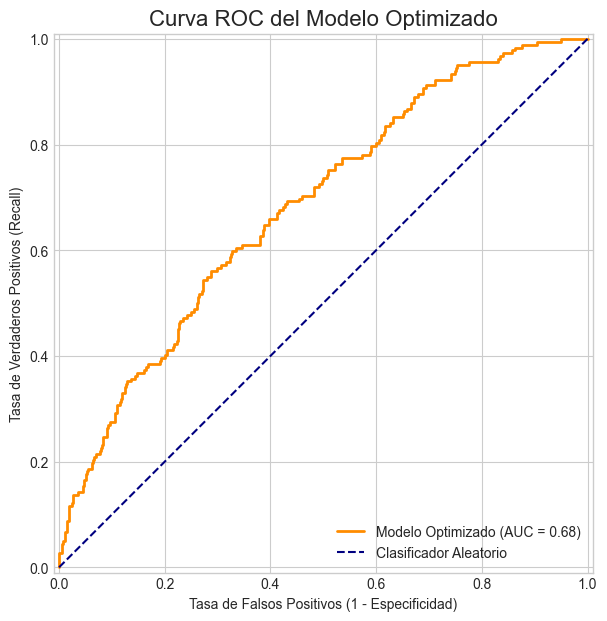

In [14]:
#Curva ROC

fig, ax = plt.subplots(figsize=(8, 7))

# Graficar la Curva ROC para el modelo optimizado ('best_model')
RocCurveDisplay.from_estimator(
    best_model,
    X_test,
    y_test,
    ax=ax,
    name='Modelo Optimizado',
    color='darkorange', # Un color que destaque
    linewidth=2
)

ax.plot([0, 1], [0, 1], linestyle='--', color='navy', label='Clasificador Aleatorio')

ax.set_title('Curva ROC del Modelo Optimizado', fontsize=16)
ax.set_xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
ax.set_ylabel('Tasa de Verdaderos Positivos (Recall)')

ax.legend(loc='lower right')
ax.grid(True)

plt.show()


### Conclusión
La optimización ha sido un éxito. Al instruir a `GridSearchCV` para que maximizara el **`recall`**, logramos transformar un modelo con una exactitud engañosa en una herramienta **útil y alineada con el objetivo del proyecto**.

El nuevo modelo identifica a un porcentaje mucho mayor de los hogares pobres (alto `recall`), a costa de una menor `precisión`, que es exactamente el intercambio que buscábamos. Esto demuestra la importancia de no solo entrenar un modelo, sino de **evaluarlo críticamente y optimizarlo para la métrica que realmente importa**

## 🔍 6. Interpretación y Ajuste del Modelo
Una de las mayores ventajas de los modelos basados en árboles como Random Forest es que podemos "preguntarles" qué variables consideraron más importantes para tomar sus decisiones.

### Importancia de Variables (Feature Importance)
El modelo calcula la importancia de cada variable midiendo cuánto contribuye a reducir la "impureza" (o el desorden) en los nodos de los árboles. Una variable que separa muy bien a los hogares pobres de los no pobres tendrá una alta importancia.

A continuación, extraeremos estas puntuaciones y las visualizaremos para validar nuestra hipótesis inicial.


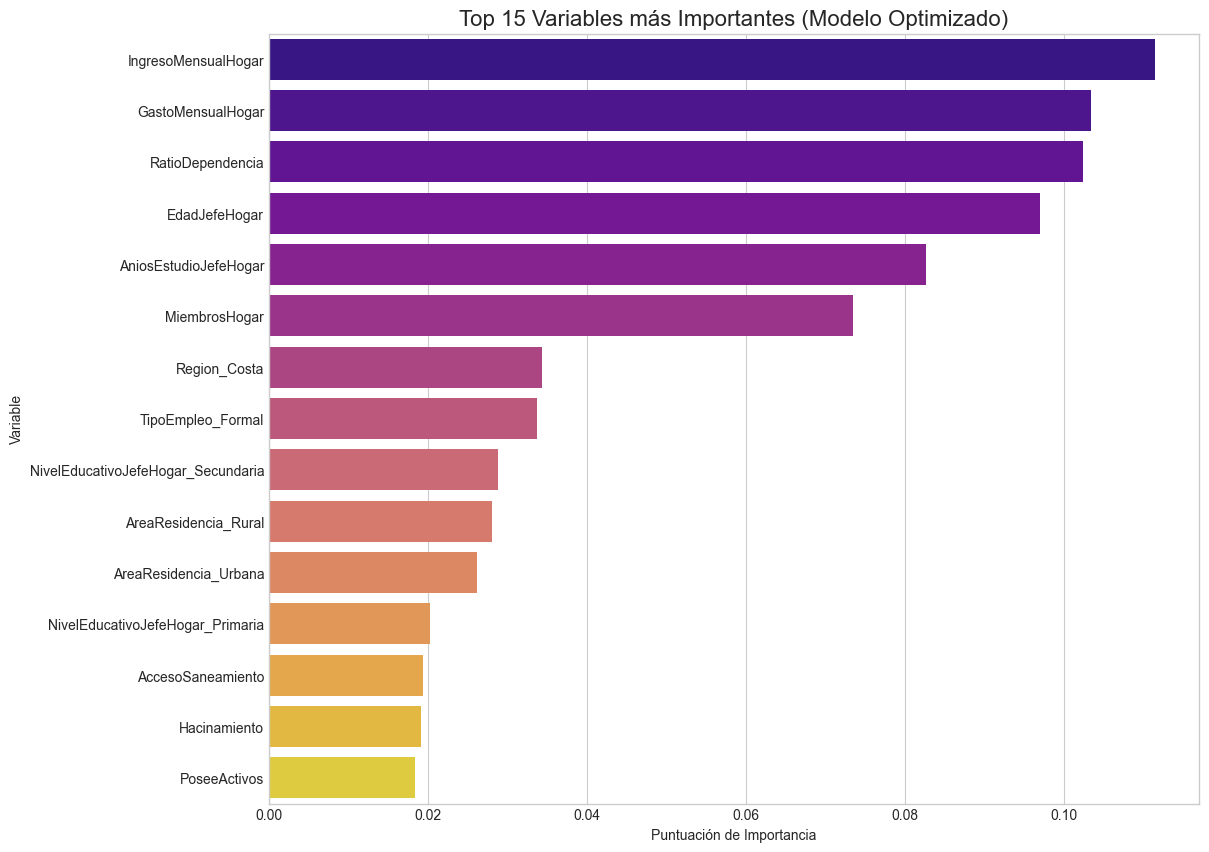


Top 10 variables más importantes:


,feature,importance
4,IngresoMensualHogar,0.111469
5,GastoMensualHogar,0.103493
2,RatioDependencia,0.102494
0,EdadJefeHogar,0.097020
3,AniosEstudioJefeHogar,0.082720
1,MiembrosHogar,0.073515
32,Region_Costa,0.034290
22,TipoEmpleo_Formal,0.033683
19,NivelEducativoJefeHogar_Secundaria,0.028783
24,AreaResidencia_Rural,0.028041


In [12]:
# Extraer los componentes del mejor modelo encontrado por GridSearchCV
preprocessor_best = best_model.named_steps['preprocessor']
classifier_best = best_model.named_steps['classifier']

# Obtener los nombres de todas las características después del preprocesamiento
try:
    ohe_feature_names = preprocessor_best.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)
except AttributeError:
    ohe_feature_names = preprocessor_best.named_transformers_['cat']['onehot'].get_feature_names(categorical_cols)

all_feature_names = np.concatenate([numerical_cols, ohe_feature_names])

# Obtener las puntuaciones de importancia del clasificador optimizado
importances = classifier_best.feature_importances_

# Crear un DataFrame para ordenar y visualizar las importancias
feature_importance_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

# Visualizar las 15 variables más importantes
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15), palette='plasma')
plt.title('Top 15 Variables más Importantes (Modelo Optimizado)', fontsize=16)
plt.xlabel('Puntuación de Importancia')
plt.ylabel('Variable')
plt.show()

# Mostrar el top 10 en una tabla
print("\nTop 10 variables más importantes:")
display(feature_importance_df.head(10))


## 🏁 7. Conclusión General del Ejercicio

Este ejercicio práctico nos ha llevado a través del ciclo de vida completo de un proyecto de Machine Learning: desde la formulación de una hipótesis hasta la construcción, evaluación crítica y optimización de un modelo predictivo. El objetivo no era solo crear un modelo, sino crear un modelo **útil y alineado con un objetivo social**: identificar a los hogares en situación de pobreza.

### Verificación de la Hipótesis Inicial

Al comienzo de la actividad, planteamos la hipótesis de que las variables más influyentes para predecir la pobreza estarían relacionadas con la capacidad económica, la educación, el empleo y la geografía. Analizando el gráfico de **"Top 15 Variables más Importantes (Modelo Optimizado)"**, podemos validar esta hipótesis.

-   **Hipótesis 1: Ingreso y Gasto del Hogar.** **CONFIRMADA.** Las dos variables más importantes, por un amplio margen, son `IngresoMensualHogar` y `GastoMensualHogar`. Esto confirma que la capacidad económica directa es el predictor más fuerte.

-   **Hipótesis 2: Nivel Educativo y Años de Estudio.** **CONFIRMADA.** `AniosEstudioJefeHogar` aparece en el top 5, y las categorías de `NivelEducativoJefeHogar` (Secundaria y Primaria) también están entre las 15 primeras, validando el rol crucial de la educación.

-   **Hipótesis 3: Tipo de Empleo.** **CONFIRMADA.** La variable `TipoEmpleo_Formal` se encuentra entre las 10 más importantes, lo que demuestra que tener un empleo formal es un factor protector significativo contra la pobreza.

-   **Hipóteses 4: Área de Residencia.** **CONFIRMADA.** Variables como `Region_Costa`, `AreaResidencia_Rural` y `AreaResidencia_Urbana` tienen una importancia notable, lo que ratifica que la geografía es un factor estructural determinante.

Además, el modelo nos ha revelado otros factores de gran importancia que no estaban en nuestra hipótesis inicial, como el `RatioDependencia`, la `EdadJefeHogar` y el número de `MiembrosHogar`, enriqueciendo nuestro entendimiento del fenómeno.

### Balance de Hallazgos: El Triunfo del `Recall` sobre la Exactitud

El hallazgo más importante de este ejercicio es la demostración práctica del **trade-off entre Precisión y Recall**.

-   **Modelo Base:** Nuestro primer modelo tenía una exactitud engañosa del 72%. Sin embargo, su **matriz de confusión** identificó a **30** hogares pobres, dejando a **152** sin detectar (Falsos Negativos). Su curva ROC, con un AUC de 0.66, mostraba un rendimiento apenas superior al azar.

-   **Modelo Optimizado:** Tras enfocar la optimización con `GridSearchCV` en maximizar el **`recall`**, el comportamiento del modelo cambió radicalmente. La nueva **matriz de confusión** muestra que ahora identificamos a **139** hogares pobres, **reduciendo los casos no detectados de 152 a solo 43**.

Este logro vino con un costo calculado: el número de Falsos Positivos (hogares no pobres clasificados incorrectamente como pobres) aumentó de 18 a 224. Sin embargo, este es un intercambio aceptable y deseable. **Es preferible investigar 224 casos que resultan no necesitar ayuda (un costo administrativo) que dejar sin apoyo a 109 familias adicionales que sí lo necesitan (un alto costo social).**

La mejora también es visible en la **Curva ROC**, que se ha desplazado hacia la esquina superior izquierda, y el **AUC ha aumentado a 0.68**, confirmando que el modelo optimizado es un clasificador superior en general.

### Aprendizajes Clave

1.  **La Métrica lo es Todo:** La elección de la métrica de evaluación (`recall` en nuestro caso) debe estar alineada con el objetivo del problema, no con la simple exactitud.
2.  **La Exactitud es Peligrosa:** En problemas con desbalance de clases, la exactitud puede ocultar un rendimiento deficiente.
3.  **La Optimización Funciona:** `GridSearchCV` es una herramienta poderosa para automatizar la búsqueda del mejor modelo para una tarea específica.
4.  **La Interpretabilidad Valida:** Analizar la importancia de las variables nos permite confirmar que el modelo ha aprendido patrones lógicos y coherentes con la realidad.

